In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os, sys
dir_path = '/content/drive/MyDrive/packages'
sys.path.insert(0, dir_path)

In [ ]:
from utils import extract_frames
from deeptrack.models import LodeSTAR
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [3]:
%matplotlib inline


In [4]:
def detect(frame, model, alpha=0.5, cutoff=0.99):    
    detections = model.predict_and_detect(frame[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]        
    return detections

In [5]:
frames = extract_frames("data\\videos\\025Hz-01.avi")
model = LodeSTAR(input_shape=(None, None, 3))
model.load_weights("models\model\weights")

In [6]:
alpha = 0.1
cutoff = 0.999

1/1 [==============================] - 3s 3s/step


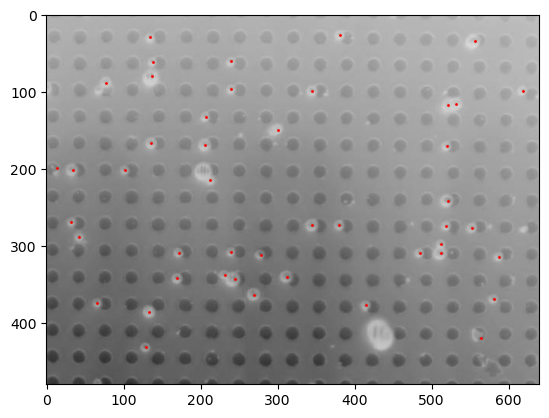

In [7]:
sample = frames[0]
sample_detections = detect(sample, model, alpha=alpha, cutoff=cutoff)
plt.imshow(sample)
plt.scatter(sample_detections[:, 1], sample_detections[:, 0], color="r", s=1)

In [8]:
detected = [detect(frame, model, alpha=alpha, cutoff=cutoff) for frame in frames[:100]]

1/1 [==============================] - 0s 300ms/step


In [9]:
# fig, ax = plt.subplots()

# def animate(i):
#     fig.clear()
#     ax = fig.add_subplot(111)
#     # ax.set_xlim(0., 0.1)
#     # ax.set_ylim(0.7, 0.75)
#     ax.imshow(frames[i], cmap="gray")
#     ax.scatter(detected[i][:, 1], detected[i][:, 0], color="r", s=1)

# ani=animation.FuncAnimation(fig, animate, interval=1000/56.95, frames=range(100))
# ani.save('detected.gif', writer='pillow')

In [10]:
spots = []
for i, frame in enumerate(detected):
    for spot in frame:
        spots.append([i, spot[1], spot[0]])

In [11]:
import pandas as pd
spots_df = pd.DataFrame(spots, columns=["frame", "x", "y"])

In [12]:
from laptrack import LapTrack

In [13]:
lt = LapTrack(gap_closing_max_frame_count=5)
track_df, _, _ = lt.predict_dataframe(spots_df, ["x", "y"], only_coordinate_cols=False)
track_df = track_df.reset_index()


In [14]:
track_df

,frame,index,frame_y,x,y,tree_id,track_id
0,0,0,0,380.640930,26.176435,0,0
1,0,1,0,134.667831,28.866356,1,1
2,0,2,0,556.055664,33.342407,2,2
3,0,3,0,137.372940,60.332153,3,3
4,0,4,0,239.630112,59.939693,4,4
...,...,...,...,...,...,...,...
4592,99,41,99,207.773392,380.478149,136,136
4593,99,42,99,483.413879,380.661926,92,92
4594,99,43,99,621.336487,381.970825,40,40
4595,99,44,99,204.189117,411.581879,45,45


In [15]:
ntracks = track_df["track_id"].nunique()

In [16]:
tracks = []
for track_id in range(ntracks):
    track = track_df[track_df["track_id"] == track_id]
    tracks.append(track)

In [17]:
# fig, ax = plt.subplots()

# def animate(i):
#     fig.clear()
#     ax = fig.add_subplot(111)
#     # ax.set_xlim(0., 0.1)
#     # ax.set_ylim(0.7, 0.75)
#     ax.imshow(frames[i], cmap="gray")
#     ax.scatter(detected[i][:, 1], detected[i][:, 0], color="r", s=1)
#     # for track in tracks:
#     #     ax.plot(track["x"], track["y"])
#     ax.plot(tracks[0]["x"], tracks[0]["y"])

# ani=animation.FuncAnimation(fig, animate, interval=1000/56.95, frames=range(100))
# ani.save('detected.gif', writer='pillow')

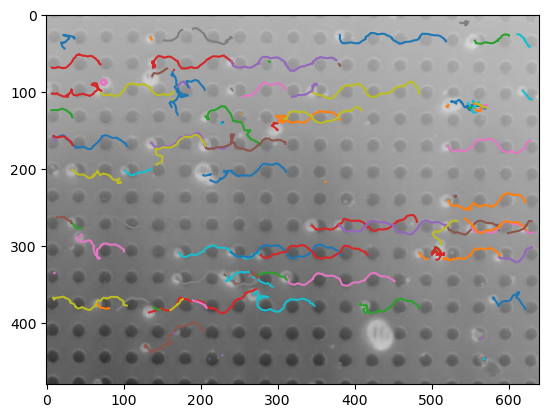

In [18]:
plt.imshow(frames[0], cmap="gray")
for track in tracks:
    plt.plot(track["x"], track["y"])
# plt.plot(tracks[0]["x"], tracks[0]["y"])

In [19]:
tracks[0]

,frame,index,frame_y,x,y,tree_id,track_id
0,0,0,0,380.640930,26.176435,0,0
46,1,0,1,380.872040,28.193090,0,0
91,2,0,2,380.362274,30.439091,0,0
134,3,0,3,382.208282,34.383396,0,0
178,4,0,4,383.856476,36.416107,0,0
...,...,...,...,...,...,...,...
4365,95,1,95,517.419739,32.454533,0,0
4411,96,1,96,517.365845,32.390041,0,0
4461,97,2,97,517.601074,33.124340,0,0
4507,98,2,98,518.447632,33.820896,0,0
